# Lyrics Visualization 

This file will visualize lyrics based on the years with the top 30 popular words and word clouds - based on music from the 90s, 80s, ...etc

In [ ]:
import boto3
import numpy as np
import pandas as pd
from io import StringIO, BytesIO

In [2]:
s3 = boto3.client("s3")
s3_resource = boto3.resource("s3")

In [3]:
bucket_name = "jenniebucket1"

In [5]:
obj = s3.get_object(Bucket=bucket_name, Key="lyrics.csv")
obj2 = s3.get_object(Bucket=bucket_name, Key="tracks_metadata.csv")

In [6]:
df = pd.read_csv(BytesIO(obj['Body'].read()))
track = pd.read_csv(BytesIO(obj2['Body'].read()))

In [9]:
df.head()

,Unnamed: 0,track_id,mxm_tid,word,count,is_test
0,0,TRAAAAV128F421A322,4623710,i,6,0
1,1,TRAAAAV128F421A322,4623710,the,4,0
2,2,TRAAAAV128F421A322,4623710,you,2,0
3,3,TRAAAAV128F421A322,4623710,to,2,0
4,4,TRAAAAV128F421A322,4623710,and,5,0


In [7]:
track.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003
1,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003
2,TRMMMNS128F93548E1,L'antarctique,SOYGNWH12AB018191E,Des cobras des tarentules,AR59BSJ1187FB4474F,891fccfc-24c1-4bfd-bf49-c736e59e443f,3 Gars Su'l Sofa,68.96281,0.555014,0.352949,2007
3,TRMMMXI128F4285A3F,N Gana,SOGPCJI12A8C13CCA0,Afropea 3 - Telling Stories To The Sea,ARBAMQB1187FB3C650,0bb5e108-b41d-46cd-969e-69d34d1acdfe,Waldemar Bastos,273.18812,0.543690,0.373679,0
4,TRMMMKI128F931D80D,006,SOSDCFG12AB0184647,Lena 20 År,ARSB5591187B99A848,fba3e876-68f1-4a1f-99d9-c604480202ba,Lena Philipsson,262.26893,0.529819,0.410229,1998


In [8]:
df['words'] = df.apply(lambda row: (row['word']+' ') * row['count'], axis=1)
df_new = df[['track_id','words']].groupby('track_id')['words'].apply(lambda x: ' '.join(x)).reset_index(name='lyric')

# Lyrics Analysis

### Stopwords Removal & Stemming

In [9]:
# Import nltk package
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
stopwords = stopwords.words('english')

Besides nltk stopwords, lyrics can contain multiple words that does not have meaning - so there are a new stopwords list will be used in analyze lyrics

In [11]:
stopwords_2 = stopwords.extend(["got","get","would","seem","will"])

In [12]:
#Clean text
import nltk 
import re
from nltk.corpus import stopwords
def preprocessing_text(lyric):
    my_stopwords = stopwords.words('english')
    wnl = nltk.WordNetLemmatizer()
    tag_remove = re.compile(r'<[^>]+>')
    review = tag_remove.sub('', lyric)
    tokens = nltk.word_tokenize(lyric)
    words =  [w.lower() for w in tokens if w.isalpha() if w.lower() not in my_stopwords]
    stem = [wnl.lemmatize(w) for w in words]
    clean_text = ' '.join(w for w in stem)
    return clean_text

In [13]:
df_new['lyric'] = df_new['lyric'].apply(lambda x:preprocessing_text(x))

In [14]:
df_new

,track_id,lyric
0,TRAAAAV128F421A322,like like de got would seem someon understand ...
1,TRAAABD128F429CF47,know know know know know time time time la la ...
2,TRAAAED128E0783FAB,love love love love love love love love love l...
3,TRAAAEF128F4273421,know got got got feel let would would would ey...
4,TRAAAEW128F42930C0,like take would wo someth stay burn burn burn ...
...,...,...
237657,TRZZZXA128F428ED56,time la get eye think give dream wo wo head so...
237658,TRZZZXV128F4289747,know like like like time get get get never bac...
237659,TRZZZYV128F92E996D,get get get get get get get get get get get ge...
237660,TRZZZYX128F92D32C6,know know time time time go go go go go go go ...


In [16]:
text = ' '.join(df_new['lyric'])

# WordCloud

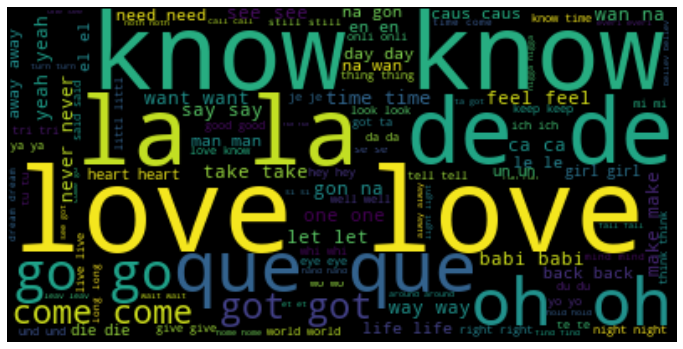

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
wordCloud_caption = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = len(text)).generate(text)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_caption,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.savefig('caption.png')
plt.show()

# Tokenization Text

In [18]:
text_token = [i for i in text.split(',') if i !='']

# Top 20 Words Popular in Lyrics

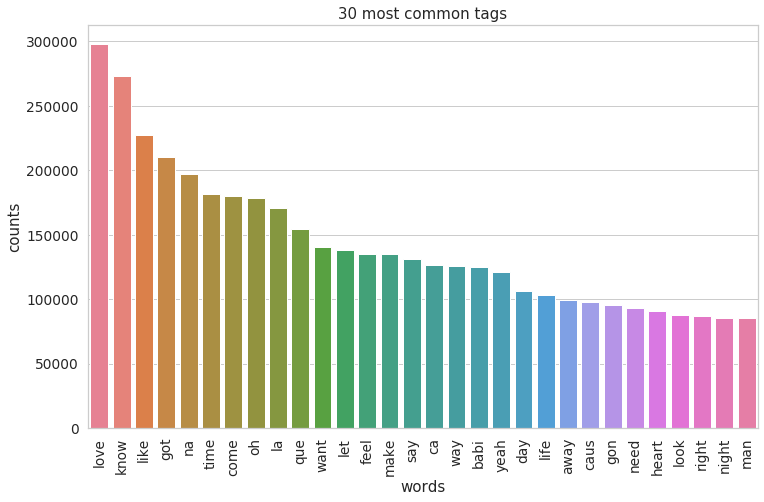

In [21]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_30_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(12, 12/1.6180))
    plt.subplot(title='30 most common tags')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(text_token)
# Visualise the 30 most common words
plot_30_most_common_words(count_data, count_vectorizer)

# Now, Lyrics Visualization by Years

In [23]:
df_lyrics = df_new.merge(track[['track_id','year']], how="inner", on="track_id")

In [24]:
df_lyrics.head()

,track_id,lyric,year
0,TRAAAAV128F421A322,like like de got would seem someon understand ...,2005
1,TRAAABD128F429CF47,know know know know know time time time la la ...,1969
2,TRAAAED128E0783FAB,love love love love love love love love love l...,0
3,TRAAAEW128F42930C0,like take would wo someth stay burn burn burn ...,0
4,TRAAAFD128F92F423A,one got never feel way way take would away awa...,2007


# Data Preparation 

Seperate lyrics by years - 2000s, 90s, 80s, 70s, 60s, 50s

In [26]:
# 2000s
df_2000 = df_lyrics[df_lyrics['year']>=2000]
# 1990s
df_1990 = df_lyrics[(df_lyrics['year']<2000) & (df_lyrics['year']>=1990)]
# 1980s
df_1980 = df_lyrics[(df_lyrics['year']<1990) & (df_lyrics['year']>=1980)]
# 1970
df_1970 = df_lyrics[(df_lyrics['year']<1980) & (df_lyrics['year']>=1970)]
# 1960
df_1960 = df_lyrics[(df_lyrics['year']<1970) & (df_lyrics['year']>=1960)]
# 1950 or smaller
df_1950 = df_lyrics[(df_lyrics['year']<1960)]

# Top 30 Popular Words in 2000s

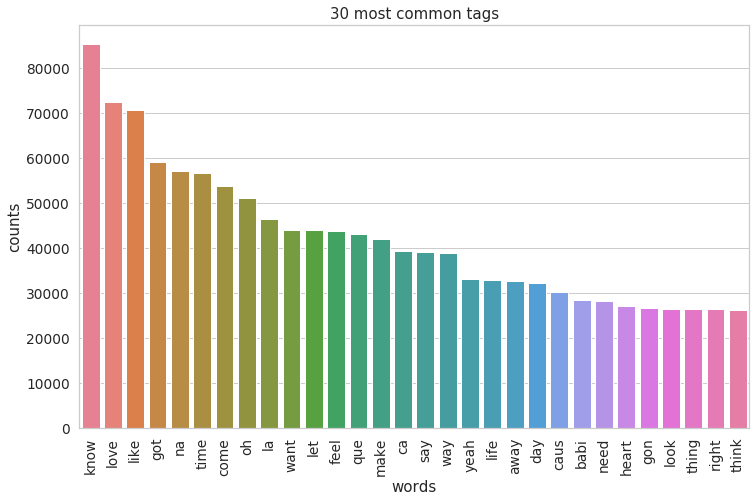

In [27]:
# Merge lyrics of 2000-2011
text_2000 = ' '.join(df_2000['lyric'])
# Tokenization
text_token_2000 = [i for i in text_2000.split(',') if i !='']
# Fit and transform the processed titles
count_data_2000 = count_vectorizer.fit_transform(text_token_2000)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_2000, count_vectorizer)

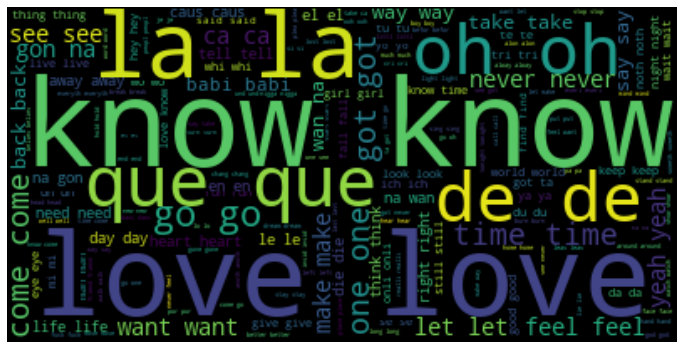

In [34]:
wordCloud_2000 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_2000)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_2000,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.savefig('caption.png')
plt.show()

# Top 30 Words Popular in Lyrics of the 90s

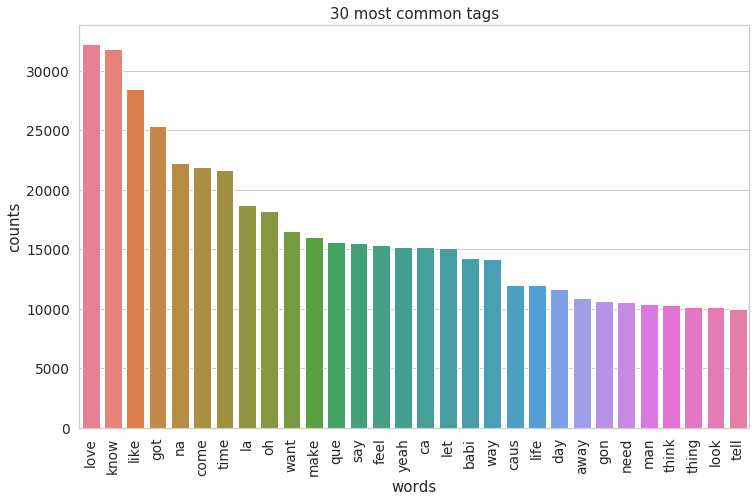

In [28]:
# Combine all the lyrics into one text
text_1990 = ' '.join(df_1990['lyric'])
# Tokenization
text_token_1990 = [i for i in text_1990.split(',') if i !='']
# Fit and transform the processed titles
count_data_1990 = count_vectorizer.fit_transform(text_token_1990)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_1990, count_vectorizer)

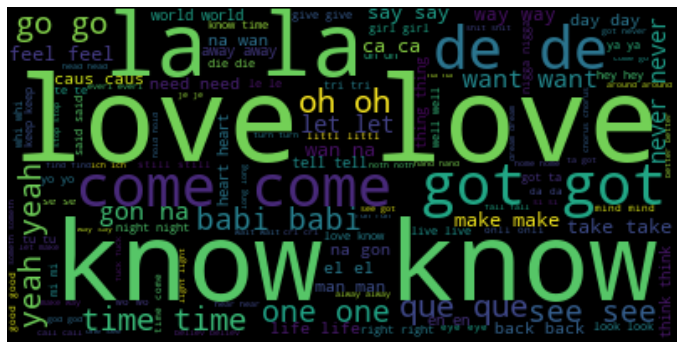

In [40]:
wordCloud_1990 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_1990)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_1990,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()

# Top 30 Words Popular in Lyrics of the 80s

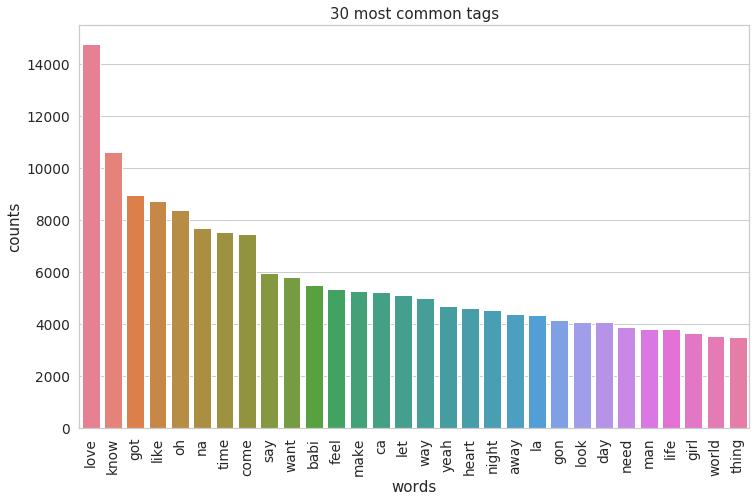

In [29]:
# Combine all the lyrics into one text
text_1980 = ' '.join(df_1980['lyric'])
# Tokenization
text_token_1980 = [i for i in text_1980.split(',') if i !='']
# Fit and transform the processed titles
count_data_1980 = count_vectorizer.fit_transform(text_token_1980)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_1980, count_vectorizer)

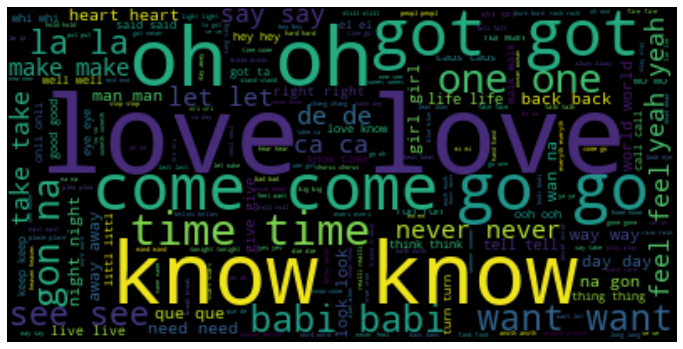

In [41]:
wordCloud_1980 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_1980)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_1980,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()

# Top 30 Words Popular in Lyrics of the 70s

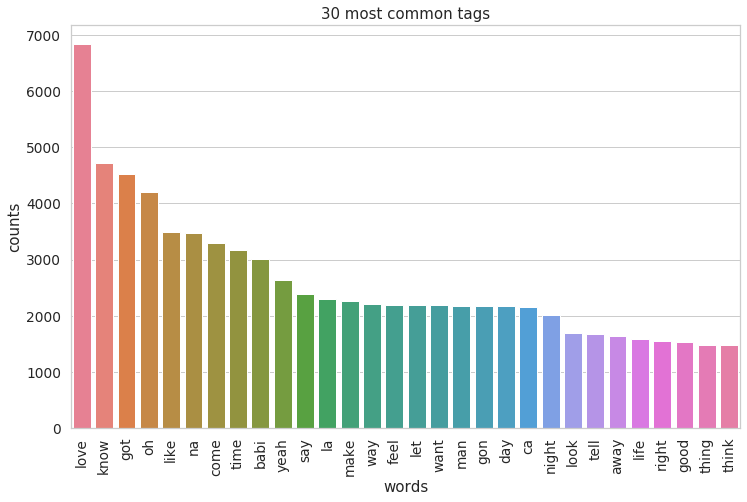

In [30]:
# Combine all the lyrics into one text
text_1970 = ' '.join(df_1970['lyric'])
# Tokenization
text_token_1970 = [i for i in text_1970.split(',') if i !='']
# Fit and transform the processed titles
count_data_1970 = count_vectorizer.fit_transform(text_token_1970)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_1970, count_vectorizer)

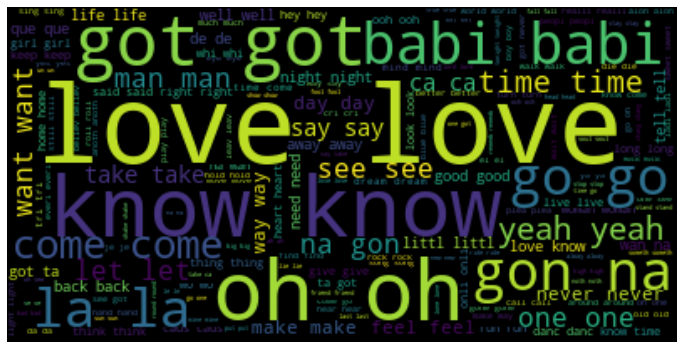

In [42]:
wordCloud_1970 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_1970)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_1970,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()

# Top 30 Words Popular in Lyrics of the 60s

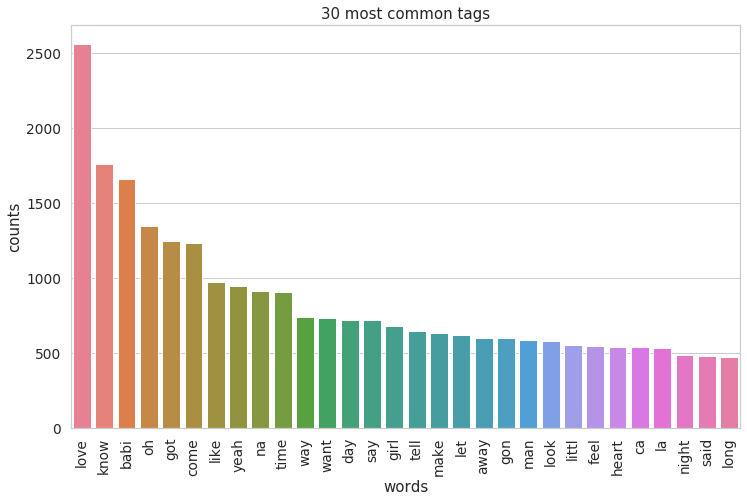

In [31]:
# Combine all the lyrics into one text
text_1960 = ' '.join(df_1960['lyric'])
# Tokenization
text_token_1960 = [i for i in text_1960.split(',') if i !='']
# Fit and transform the processed titles
count_data_1960 = count_vectorizer.fit_transform(text_token_1960)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_1960, count_vectorizer)

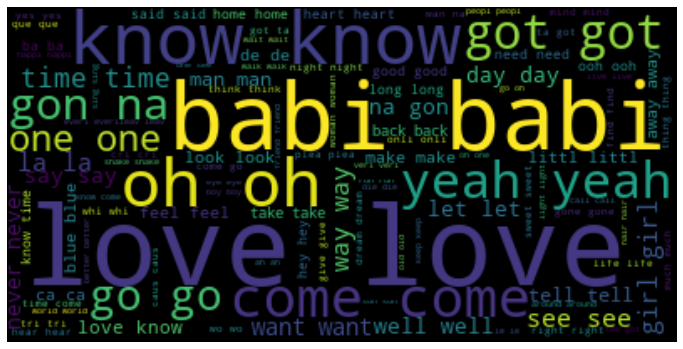

In [43]:
wordCloud_1960 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_1960)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_1960,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()

# Top 30 Words Popular in Lyrics of the 50s or less

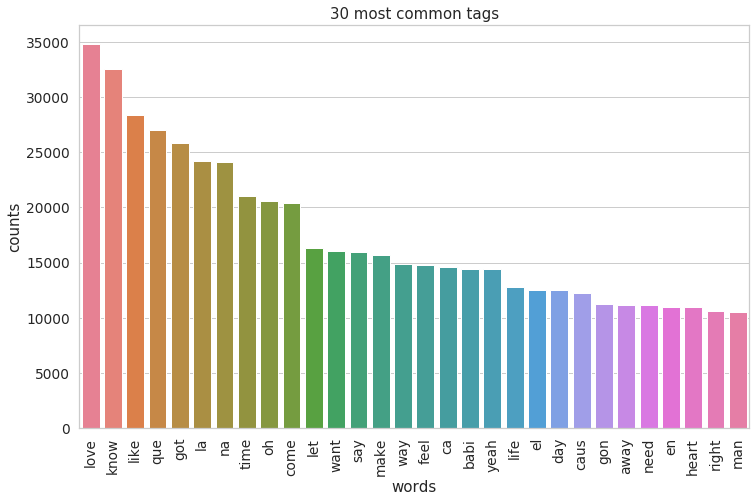

In [32]:
# Combine all the lyrics into one text
text_1950 = ' '.join(df_1950['lyric'])
# Tokenization
text_token_1950 = [i for i in text_1950.split(',') if i !='']
# Fit and transform the processed titles
count_data_1950 = count_vectorizer.fit_transform(text_token_1950)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_1950, count_vectorizer)

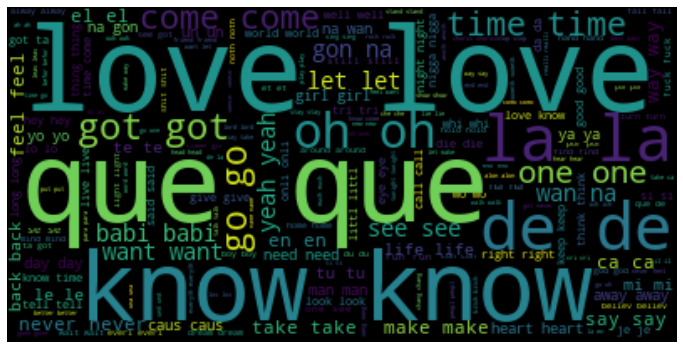

In [44]:
wordCloud_1950 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_1950)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_1950,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()